<a href="https://colab.research.google.com/github/mlacasa/ProcessMining/blob/main/pm4py_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de uso de la libreria PM4PY

Dataset: https://gitlab.com/healthcare2/process-mining-tutorial/-/blob/master/ArtificialPatientTreatment.csv

In [2]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 748 kB 49.5 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.1 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=138f27cb27677f68cc0afbee268fa05c129aad16afd63dd8c09d3ba1cb8394ab
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24195 sha256=edebac4ecd9bc78c3a8adf27d4bbdb544c5e3f5986bf5c835fe89b93bf7b9a98
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built pyvis stringdist


In [3]:
import pandas as pd
import pm4py

In [4]:
# Cargamos la dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mineria Processos/ArtificialPatientTreatment.csv')

In [5]:
df.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [36]:
df.dtypes

patient                           object
action                            object
doctor                            object
DateTime             datetime64[ns, UTC]
case:concept:name                 object
concept:name                      object
time:timestamp       datetime64[ns, UTC]
dtype: object

In [11]:
# Modificamos nombre de columnas (ojo que hay un espacio -> ' action')
df.columns = ['patient', 'action', 'doctor', 'DateTime']

In [12]:
# Convertimos a dataset para pm4py
event_log = pm4py.format_dataframe(df, case_id='patient',  activity_key='action',timestamp_key='DateTime')

<ipython-input-12-71164c8a82c1>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log = pm4py.format_dataframe(df, case_id='patient',  activity_key='action',timestamp_key='DateTime')


In [15]:
event_log.head()

,patient,action,doctor,DateTime,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11+00:00,patient 0,First consult,2017-01-02 11:40:11+00:00,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33+00:00,patient 0,Blood test,2017-01-02 12:47:33+00:00,1,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50+00:00,patient 0,Physical test,2017-01-02 12:53:50+00:00,2,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06+00:00,patient 0,Second consult,2017-01-02 16:21:06+00:00,3,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09+00:00,patient 0,Surgery,2017-01-05 13:23:09+00:00,4,0


In [46]:
action = [x for x in event_log.action.unique()]
action

[' First consult',
 ' Blood test',
 ' Physical test',
 ' Second consult',
 ' Surgery',
 ' Final consult',
 ' X-ray scan',
 ' Medicine']

In [23]:
# Número de registros (690 registros y 9 columnas)
event_log.shape

(690, 9)

In [25]:
# Número de eventos, 100  pacientes registrados.
len(event_log.patient.unique())

100

In [30]:
#Número de repetición de cada evento
pd.DataFrame.from_dict(pm4py.get_variants(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp'), orient = 'index')

,0
"( First consult, Blood test, Physical test, Second consult, Surgery, Final consult)",2
"( First consult, Physical test, Blood test, X-ray scan, Second consult, Medicine, Final consult)",10
"( First consult, Physical test, Blood test, X-ray scan, Second consult, Surgery, Final consult)",4
"( First consult, Blood test, X-ray scan, Physical test, Second consult, Medicine, Final consult)",18
"( First consult, X-ray scan, Physical test, Blood test, Second consult, Medicine, Final consult)",12
"( First consult, Physical test, Blood test, Second consult, Medicine, Final consult)",3
"( First consult, Physical test, X-ray scan, Blood test, Second consult, Medicine, Final consult)",11
"( First consult, X-ray scan, Blood test, Physical test, Second consult, Medicine, Final consult)",9
"( First consult, Blood test, Physical test, X-ray scan, Second consult, Medicine, Final consult)",14
"( First consult, X-ray scan, Blood test, Physical test, Second consult, Surgery, Final consult)",4


In [48]:
# Cuántas veces se encuentra la actividad 'a' en las secuencias?
# Ejemplo: First consult: {0:100} se encuentra los 100 eventos como orden 0 (el primero)
# Blood test en 40 ocasiones es la 2a actividad, en 32 la 3a y en 28 la 4a.
for a in action:
  num = pm4py.get_activity_position_summary(event_log, a ,activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
  print(a, num)

 First consult {0: 100}
 Blood test {1: 40, 2: 32, 3: 28}
 Physical test {2: 36, 1: 33, 3: 31}
 Second consult {4: 90, 3: 10}
 Surgery {5: 16, 4: 4}
 Final consult {6: 90, 5: 10}
 X-ray scan {2: 32, 3: 31, 1: 27}
 Medicine {5: 74, 4: 6}


In [51]:
patients = [x for x in event_log.patient.unique()]
patients[:3]

['patient 0', 'patient 1', 'patient 10']

In [55]:
# Duración por caso (paciente)
for p in patients:
  d = pm4py.get_case_duration(event_log, p)
  print(p, d)

/usr/local/lib/python3.8/dist-packages/pm4py/statistics/traces/generic/pandas/case_statistics.py:185: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  stacked_df[timestamp_key + "_2"] = stacked_df[timestamp_key + "_2"].astype('int64') // 10 ** 9
/usr/local/lib/python3.8/dist-packages/pm4py/statistics/traces/generic/pandas/case_statistics.py:186: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  stacked_df[start_timestamp_key] = stacked_df[start_timestamp_key].astype('int64') // 10 ** 9


patient 0 593357.0
patient 1 359926.0
patient 10 1112762.0
patient 11 1197473.0
patient 12 603319.0
patient 13 693634.0
patient 14 682715.0
patient 15 683701.0
patient 16 1008518.0
patient 17 1125842.0
patient 18 679722.0
patient 19 856484.0
patient 2 1129919.0
patient 20 698084.0
patient 21 1020540.0
patient 22 874830.0
patient 23 1381280.0
patient 24 531349.0
patient 25 419066.0
patient 26 628224.0
patient 27 621457.0
patient 28 1026792.0
patient 29 758873.0
patient 3 1026368.0
patient 30 608684.0
patient 31 603232.0
patient 32 575205.0
patient 33 838455.0
patient 34 873454.0
patient 35 250020.0
patient 36 780415.0
patient 37 1298409.0
patient 38 953274.0
patient 39 256478.0
patient 4 1196574.0
patient 40 272357.0
patient 41 611127.0
patient 42 622221.0
patient 43 606533.0
patient 44 775073.0
patient 45 1121202.0
patient 46 1040567.0
patient 47 1478584.0
patient 48 424825.0
patient 49 797009.0
patient 5 788093.0
patient 50 1110755.0
patient 51 1024701.0
patient 52 607342.0
patient 53

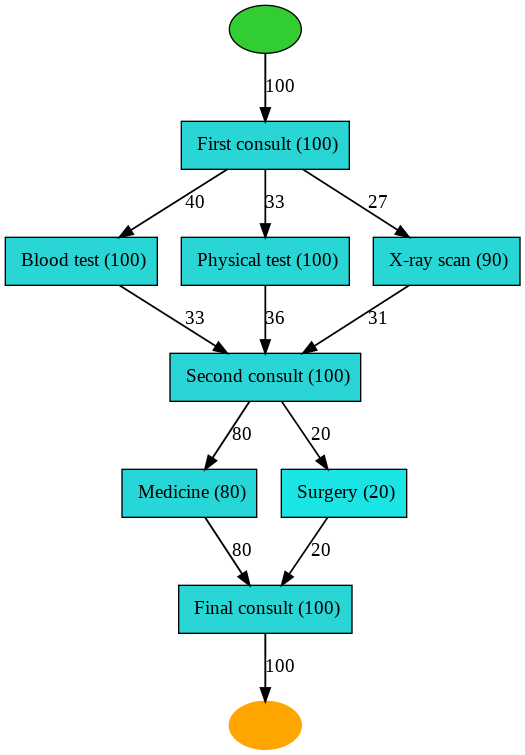

In [49]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

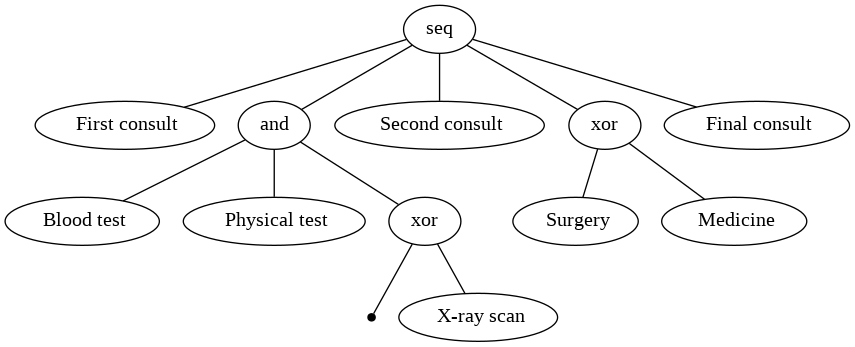

In [61]:
tree = pm4py.discover_process_tree_inductive(event_log)
pm4py.view_process_tree(tree)


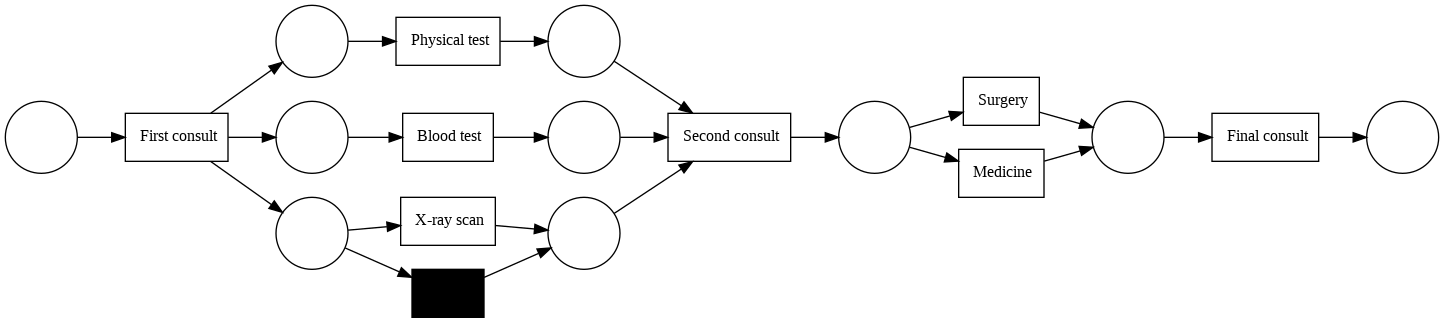

In [62]:
net, im, fm = pm4py.discover_petri_net_heuristics(event_log, dependency_threshold=0.99)
net, initial_marking, final_marking = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

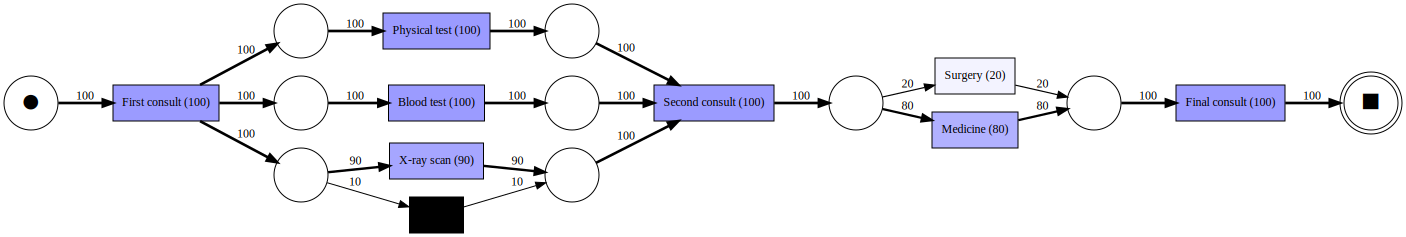

In [65]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log)
#pn_visualizer.save(gviz, "inductive_frequency.png")
gviz